In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pprint

from google3.util.operations_research.cloud.lattle.experiments import graph_utils

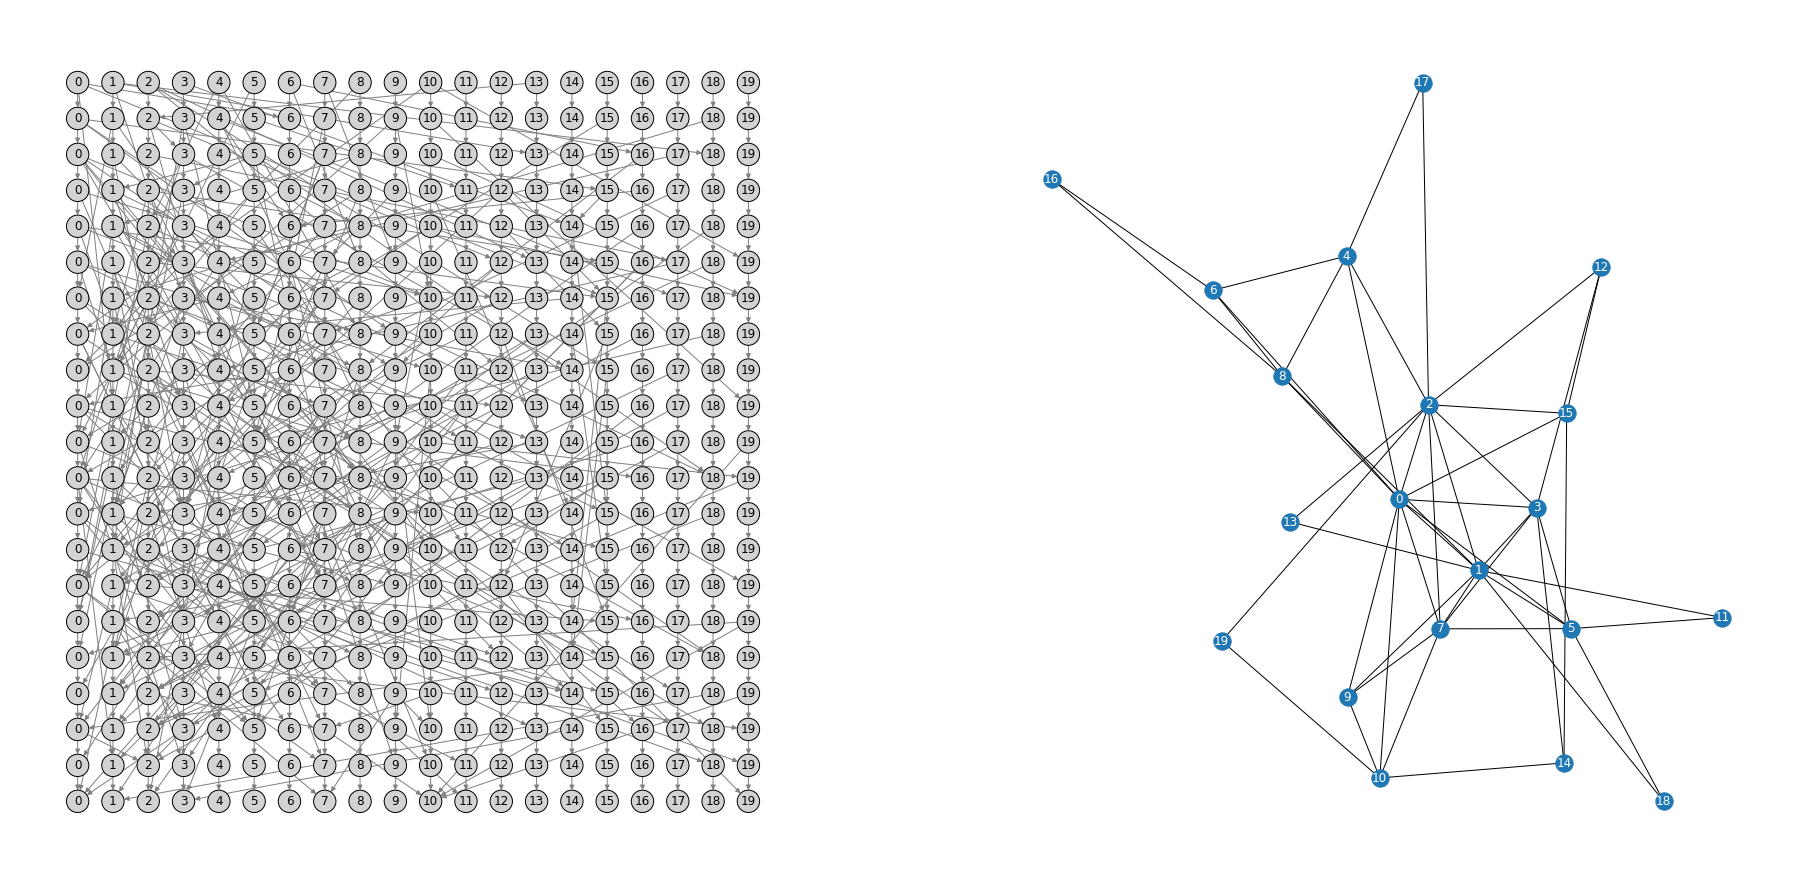

In [2]:
scale_factor = 0.8  # Plotting scale
num_hubs = 20  # Number of depots in the network.
timesteps = 20  # Number of time steps.
num_parcels = 100  # Number of parcels in the network.

# Generate and plot random time-expanded transportation network.
rng = np.random.default_rng(seed=42)
state, network, distances = graph_utils.make_random_network(
    rng=rng,
    num_hubs=num_hubs,
    timesteps=timesteps,
    num_trucks_per_step=num_hubs,
    max_truck_duration=timesteps // 2,
)
unpruned_state = state
fig, ax = plt.subplots(
    1, 2, figsize=(2 * num_hubs * scale_factor, timesteps * scale_factor)
)
graph_utils.draw_network(state, ax=ax[0])
nx.draw(network.to_undirected(), ax=ax[1], with_labels=True, font_color='w')

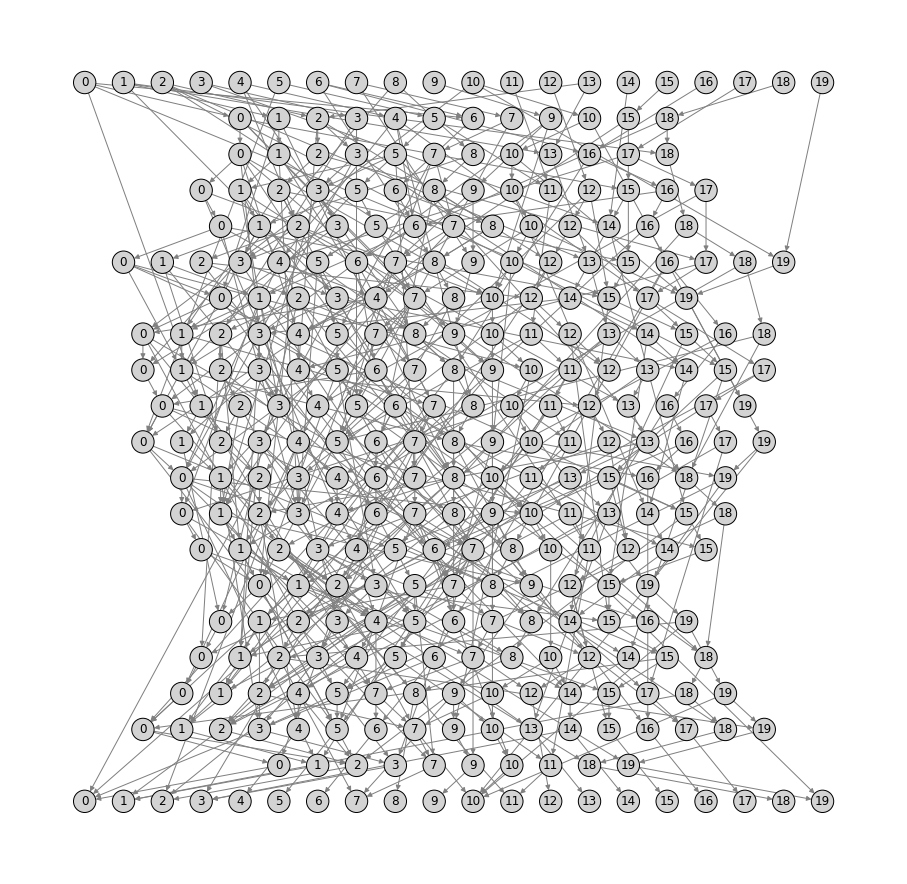

In [3]:
# Prune network and plot.
fig, ax = plt.subplots(figsize=(num_hubs * scale_factor, timesteps * scale_factor))
state, new_connections, *_ = graph_utils.prune_network(state, prune_parcels=False)
connections = new_connections
graph_utils.draw_network(state, ax)

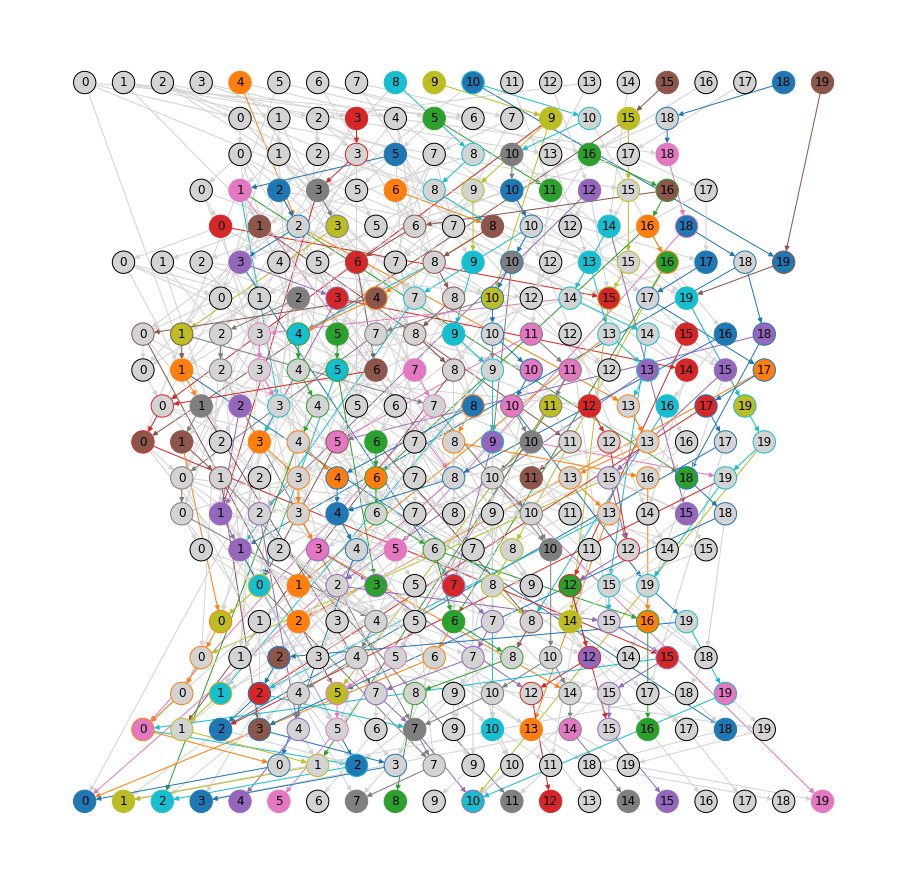

In [4]:
# Add parcels to the network and plot solutions.
state, solution = graph_utils.make_random_parcels(
    rng=rng,
    state=state,
    network=network,
    distances=distances,
    num_parcels=num_parcels,
    mean_route_length=timesteps // 2,
    cut_capacities=1  # Remove all excess capcity from trucks (more difficult)
)
fig, ax = plt.subplots(
    figsize=(num_hubs * scale_factor, timesteps * scale_factor)
)
graph_utils.draw_network(state, ax, solution)

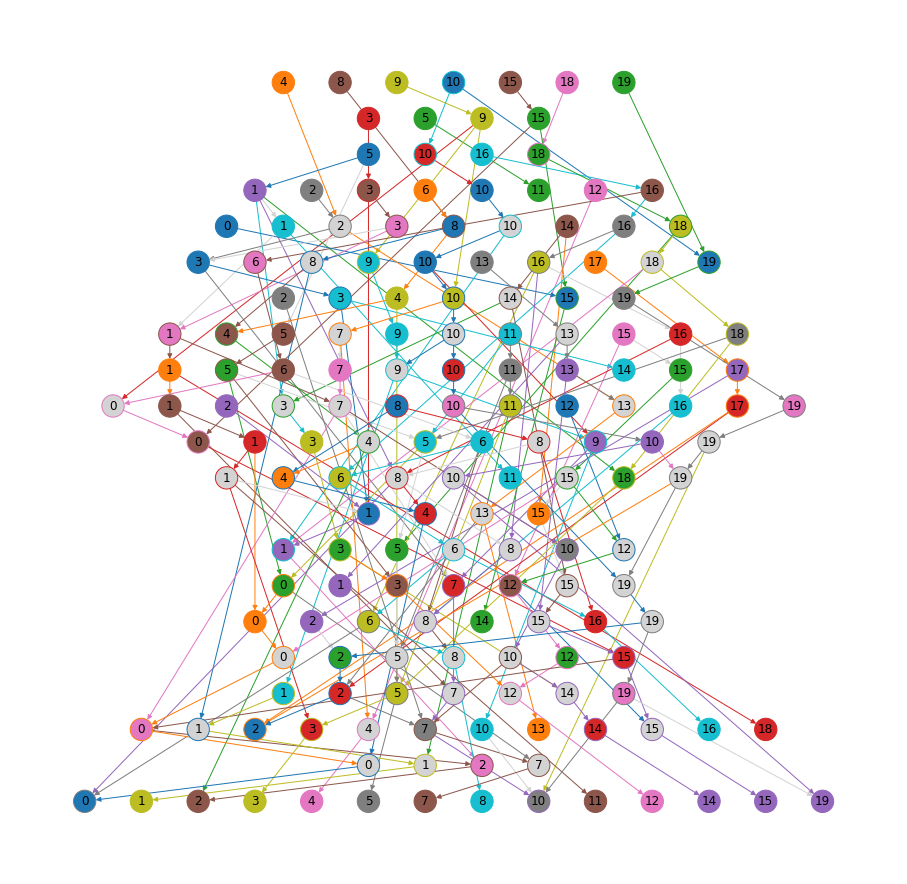

In [5]:
# Prune network and plot.
fig, ax = plt.subplots(
    figsize=(num_hubs * scale_factor, timesteps * scale_factor)
)
state, new_connections, edge_parcels, solution = graph_utils.prune_network(state, solution=solution)
connections |= new_connections
graph_utils.draw_network(state, ax, solution)

In [7]:
print(f"Unpruned state: {len(unpruned_state.nodes)} nodes, {len(unpruned_state.edges)} edges")
print(f"Pruned state: {len(state.nodes)} nodes, {len(state.edges)} edges")

Unpruned state: 420 nodes, 1402 edges
Pruned state: 173 nodes, 662 edges
